# EMNLP 2019 accepted paper list analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS 

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
papers = []
paper_type = 'long'
with open('emnlp_papers.txt') as f:
    while True:
        try:
            line = next(f)
        except StopIteration:
            break
        if not line.strip():
            continue
        if line.strip() == 'Long Papers':
            paper_type = 'long'
        elif line.strip() == 'Short Papers':
            paper_type = 'short'
        elif line.strip() == 'Demo Papers':
            paper_type = 'demo'
        else:
            title = line.strip()
            authors = next(f).strip()
            papers.append({'title': title, 'authors': authors, 'type': paper_type})
papers = pd.DataFrame(papers)
print("{} papers accepts".format(len(papers)))

727 papers accepts


# Long vs. short vs. demo papers

In [3]:
papers.type.value_counts()

long     466
short    217
demo      44
Name: type, dtype: int64

In [4]:
def authors2list(authors):
    if ' and ' not in authors:
        return [authors.strip()]
    first, last = authors.split(' and ')
    return first.split(', ') + [last.strip()]

papers['author_list'] = papers.authors.apply(authors2list)
papers['first_author'] = papers.author_list.apply(lambda a: a[0])

# First authors with more than one accepted paper

In [5]:
p = papers.first_author.value_counts()
p[p>1]

Eric Wallace                3
Chuhan Wu                   3
Dongyeop Kang               3
Jingjing Xu                 3
Ming Tan                    2
Chunning Du                 2
Libo Qin                    2
Jesse Dodge                 2
Hagai Taitelbaum            2
Kawin Ethayarajh            2
Edoardo Maria Ponti         2
Binxuan Huang               2
Mengting Hu                 2
Xiaoyu Shen                 2
Yiming Cui                  2
Zeynep Akkalyoncu Yilmaz    2
Elena Voita                 2
Wenjie Zhou                 2
Lijun Wu                    2
Jie Hao                     2
Ze Yang                     2
Brian Thompson              2
Deng Cai                    2
Ming Jiang                  2
Bailin Wang                 2
Zi-Yi Dou                   2
Mingda Chen                 2
Zhenjie Zhao                2
Bonan Min                   2
Zhangming Chan              2
Name: first_author, dtype: int64

In [6]:
author_cnt = defaultdict(int)

for al in papers.author_list:
    for a in al:
        author_cnt[a] += 1

# Authors with more 5+ papers

In [7]:
sorted(author_cnt.items(), key=lambda l: -l[1])[:39]

[('Ting Liu', 10),
 ('Shuming Shi', 8),
 ('Luke Zettlemoyer', 8),
 ('Lidong Bing', 8),
 ('Zhiyuan Liu', 8),
 ('Dongyan Zhao', 8),
 ('Iryna Gurevych', 7),
 ('Jimmy Lin', 7),
 ('Xiang Ren', 7),
 ('Zhaopeng Tu', 7),
 ('Kai-Wei Chang', 7),
 ('Noah A. Smith', 7),
 ('Guodong Zhou', 6),
 ('Ryan Cotterell', 6),
 ('Graham Neubig', 6),
 ('Jie Zhou', 6),
 ('Jianfeng Gao', 6),
 ('Wei Lu', 6),
 ('Xu SUN', 6),
 ('Ivan Titov', 6),
 ('Yue Zhang', 6),
 ('Matt Gardner', 6),
 ('Rui Yan', 6),
 ('Maosong Sun', 6),
 ('Mirella Lapata', 6),
 ('Wanxiang Che', 5),
 ('Min Zhang', 5),
 ('Anders Søgaard', 5),
 ('Mohit Bansal', 5),
 ('Dan Roth', 5),
 ('Preslav Nakov', 5),
 ('Yejin Choi', 5),
 ('Yansong Feng', 5),
 ('Tao QIN', 5),
 ('Kang Liu', 5),
 ('Jun Zhao', 5),
 ('Nanyun Peng', 5),
 ('Xing Wang', 5),
 ('Xu Han', 5)]

# Number of authors-per-paper

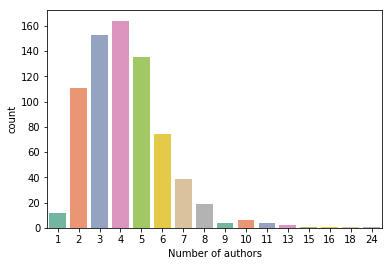

In [8]:
papers['n_authors'] = papers.author_list.apply(len)
ax = sns.countplot(papers['n_authors'], palette='Set2')
_ = ax.set_xlabel("Number of authors")

# 80 most frequent words in the titles

In [9]:
word_cnt = pd.DataFrame(columns=['count'])

for title in papers.title:
    for word in title.lower().split():
        if not word in word_cnt.index:
            word_cnt.loc[word] = 0
        word_cnt.loc[word] += 1

splits = [d.reset_index(drop=True) for d in np.split(word_cnt.sort_values('count', ascending=False).head(80).reset_index(), [20, 40, 60])]
pd.concat(splits, axis=1).rename(columns={'index': 'word'})

,word,count,word,count,word,count,word,count
0,for,342,model,33,unsupervised,23,information,17
1,a,162,on,33,dataset,23,supervised,15
2,and,149,network,33,dialogue,22,evaluation,15
3,with,133,analysis,32,an,22,sequence,15
4,of,111,extraction,32,deep,22,study,15
5,in,102,via,32,hierarchical,22,low-resource,15
6,learning,95,modeling,30,detection,22,understanding,15
7,neural,80,entity,30,approach,21,transfer,15
8,text,69,cross-lingual,30,embeddings,21,labeling,15
9,the,68,from,30,summarization,21,multilingual,15


# Title wordclouds

without stopwords

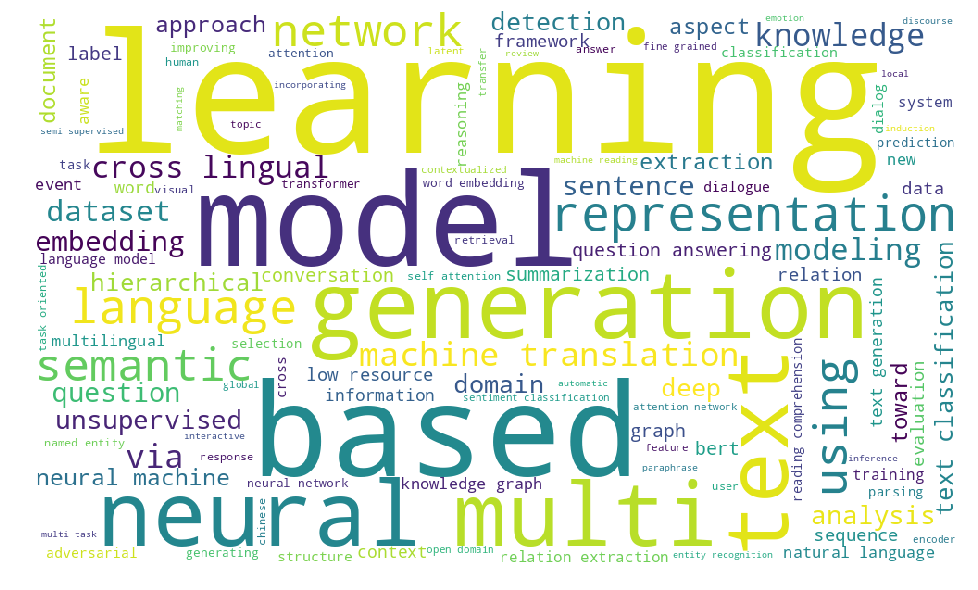

In [10]:
wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(" ".join(papers.title).lower()) 
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 